In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy import linalg
import random
import math
from sklearn.cluster import KMeans
import ipyvolume as ipv

Набор данных ex7data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X1 и X2 - координаты точек, для которых необходимо выделить главные компоненты.

**1. Загрузите данные ex7data1.mat из файла.**

In [2]:
data1 = scipy.io.loadmat('ex7data1.mat')
X1 = data1['X']
X1.shape

(300, 2)

**2. Постройте график загруженного набора данных.**

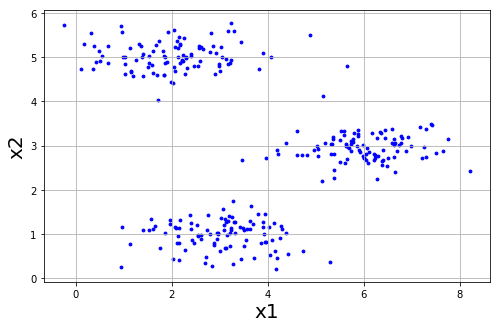

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(X1[:,0], X1[:,1], s=8, color='blue')
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.grid(True)

**3. Реализуйте функцию вычисления матрицы ковариации данных.**

In [4]:
def normalization(X):
    mean = np.mean(X,axis=0)
    std  = np.std(X,axis=0)
    
    return ((X - mean) / std), mean, std

In [5]:
def calc_sigma(X):
    m = len(X)
    
    return ( 1 / m) * np.dot(X.T, X)

In [6]:
norm_X1, norm_mean, norm_std = normalization(X1)
Sigma = calc_sigma(norm_X1)

print(f'X.shape = {X1.shape}')
print(f'Sigma.shape = {Sigma.shape}')

X.shape = (300, 2)
Sigma.shape = (2, 2)


**4. Вычислите координаты собственных векторов для набора данных с помощью сингулярного разложения матрицы ковариации (разрешается использовать библиотечные реализации матричных разложений).**

In [7]:
U, S, _ = linalg.svd(Sigma)

In [8]:
U.shape

(2, 2)

**5. Постройте на графике из пункта 2 собственные векторы матрицы ковариации.**

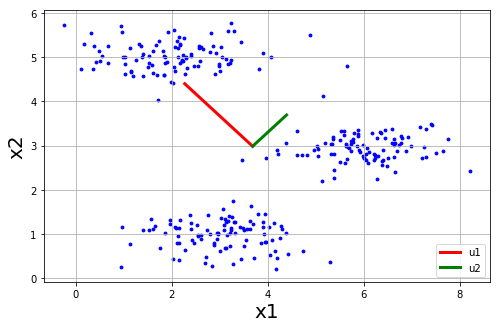

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(X1[:,0], X1[:,1], s=8, color='blue')
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)

u1 = U[:, 0]
u2 = U[:, 1]

plt.plot([norm_mean[0], norm_mean[0] + 2 * u1[0]], [norm_mean[1], norm_mean[1] + 2 * u1[1]], color='red',linewidth=3, label='u1')
plt.plot([norm_mean[0], norm_mean[0] + u2[0]], [norm_mean[1], norm_mean[1] + u2[1]], color='green',linewidth=3, label='u2')

plt.legend(loc='lower right')
plt.grid(True)

**6. Реализуйте функцию проекции из пространства большей размерности в пространство меньшей размерности с помощью метода главных компонент.**

In [10]:
def get_k_vectors(U, k):
    return U[:, 0 : k]

In [11]:
def run_pca(X_norm, k):
    Sigma = calc_sigma(X_norm)
    U, S, _ = linalg.svd(Sigma)
    U_red = get_k_vectors(U, k)
    
    return np.dot(X_norm, U_red), U_red, S

In [12]:
def calc_dispersion(S, K):
    return np.sum(S[0: K])/np.sum(S)

In [13]:
Z, U_red, _ = run_pca(norm_X1, 1)

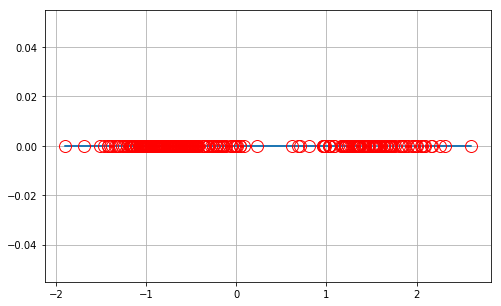

In [14]:
plt.figure(figsize=(8,5))
plt.plot(Z, np.zeros(len(Z)), '-')
plt.plot(Z, np.zeros(len(Z)), 'o', markersize=12, markerfacecolor='none', markeredgecolor='red')
plt.grid(True)

**7. Реализуйте функцию вычисления обратного преобразования.**

In [15]:
def pca_revert(Z, U_red):
    return np.dot(Z, U_red.T)

**8. Постройте график исходных точек и их проекций на пространство меньшей размерности (с линиями проекций).**

In [16]:
X1_approx_norm = pca_revert(Z, U_red)
X1_approx = (X1_approx_norm * norm_std) + norm_mean

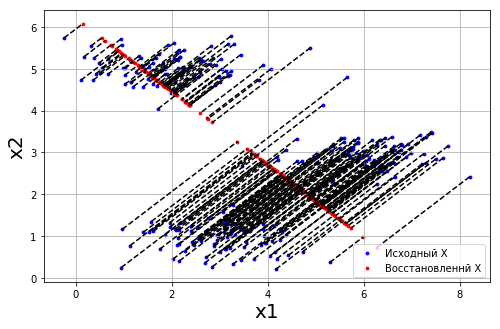

In [17]:
plt.figure(figsize=(8,5))
plot = plt.scatter(X1[:,0], X1[:,1], s=8, color='blue', label='Исходный X')
plot = plt.scatter(X1_approx[:,0], X1_approx[:,1], s=8, color='red', label='Восстановленнй X')

plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)

for i in range(len(X1)):
    plt.plot([X1[i,0], X1_approx[i,0]],[X1[i,1], X1_approx[i,1]],'k--', markersize=1)
    
plt.legend(loc='lower right')
plt.grid(True)

Набор данных ex7faces.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит 5000 изображений 32x32 в оттенках серого. Каждый пиксель представляет собой значение яркости (вещественное число). Каждое изображение сохранено в виде вектора из 1024 элементов. В результате загрузки набора данных должна быть получена матрица 5000x1024.

**9. Загрузите данные ex7faces.mat из файла.**

In [18]:
faces_data = scipy.io.loadmat('ex7faces.mat')
faces_X = faces_data['X']
faces_X.shape

(5000, 1024)

**10. Визуализируйте 100 случайных изображений из набора данных.**

In [19]:
def show_images(data, count):
    m = len(data)
    n = data.shape[1]
    
    if count > m: count = m
        
    indices = random.sample(range(0, m), count)
    
    img_width = int(math.sqrt(n))
    img_height = img_width
    
    images_to_show = data[indices]
    
    cols = 10
    if count < 10:
        cols = count
        
    rows = math.ceil(count / cols)
    
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols, rows))
    axs = axs.flatten()
    
    for i in range(len(axs)):
        ax = axs[i]
        ax.axis('off')
        if (i >= count): continue
        ax.imshow(images_to_show[i].reshape(img_width, img_height).T, cmap='gray')

    
    plt.show()

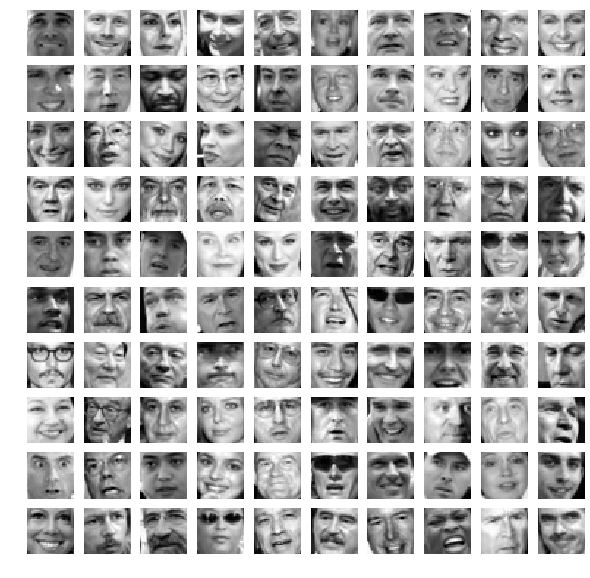

In [20]:
show_images(faces_X, 100)

**11. С помощью метода главных компонент вычислите собственные векторы.**

In [21]:
faces_norm_X, faces_norm_mean, faces_norm_std = normalization(faces_X)

**12. Визуализируйте 36 главных компонент с наибольшей дисперсией.**

In [22]:
Z_36, U_red_36, S_36 = run_pca(faces_norm_X, 36)

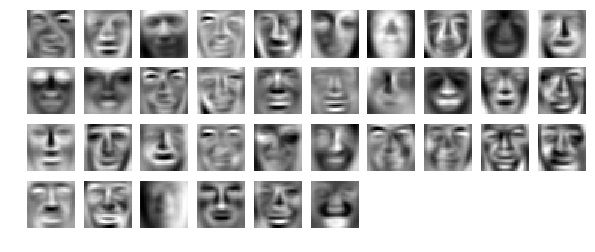

In [23]:
show_images(U_red_36.T, 36)

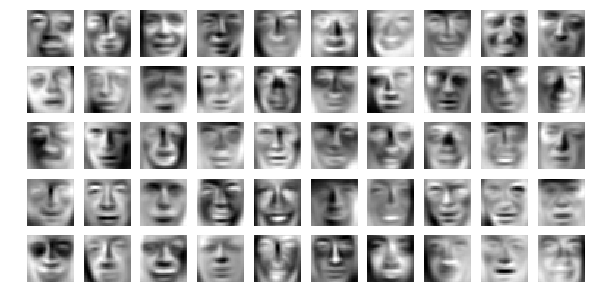

In [24]:
show_images(pca_revert(Z_36, U_red_36), 50)

**13. Как изменилось качество выбранных изображений?**

In [25]:
print(f'{(calc_dispersion(S_36, 36) * 100):.2f}% - дисперсии сохраняется')

83.12% - дисперсии сохраняется


Визуально, качество сильно ухудшилось. На картинках еле различимы очертания лиц.

**14. Визуализируйте 100 главных компонент с наибольшей дисперсией.**

In [26]:
Z_100, U_red_100, S_100 = run_pca(faces_norm_X, 100)

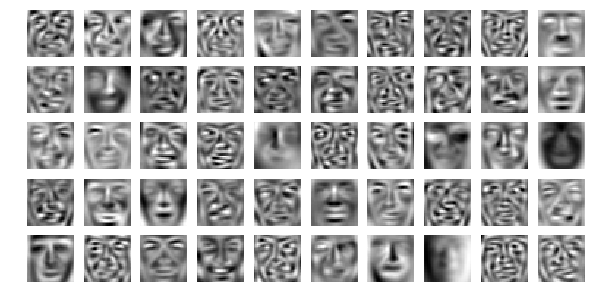

In [27]:
show_images(U_red_100.T, 50)

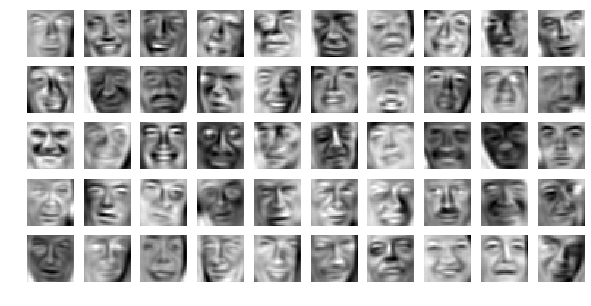

In [28]:
show_images(pca_revert(Z_100, U_red_100), 50)

**15. Как изменилось качество выбранных изображений?**

In [29]:
print(f'{(calc_dispersion(S_100, 100) * 100):.2f}% - дисперсии сохраняется')

93.19% - дисперсии сохраняется


Визуализация 100 главных компонент имеет более сложные "узоры" чем у 36 главных компонент. Визуально, качество восстановленных изображений возрасло.

**16. Используйте изображение, сжатое в лабораторной работе №6 (Кластеризация).**

In [30]:
bird_data = scipy.io.loadmat('bird_small.mat')
Xb = bird_data['A'].reshape(-1, 3)
bird_norm_X, bird_norm_mean, bird_norm_std = normalization(Xb)
bird_norm_X.shape

(16384, 3)

In [31]:
bird_k = 16
cluster = KMeans(n_clusters=bird_k, random_state=0)
cluster.fit(bird_norm_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

**17. С помощью метода главных компонент визуализируйте данное изображение в 3D и 2D.**

In [32]:
#cmap = plt.cm.tab20
cmap = plt.cm.tab20
clrs = cmap(cluster.labels_)

In [33]:
sel = np.random.choice(len(bird_norm_X), 16300)
ipv.figure()
s = ipv.scatter(bird_norm_X[sel][:,0], bird_norm_X[sel][:,1], bird_norm_X[sel][:,2], marker='sphere', size=3, color=clrs[sel])
ipv.show()

In [34]:
bird_Z_2, bird_U_red_2, bird_S_2 = run_pca(bird_norm_X, 2)

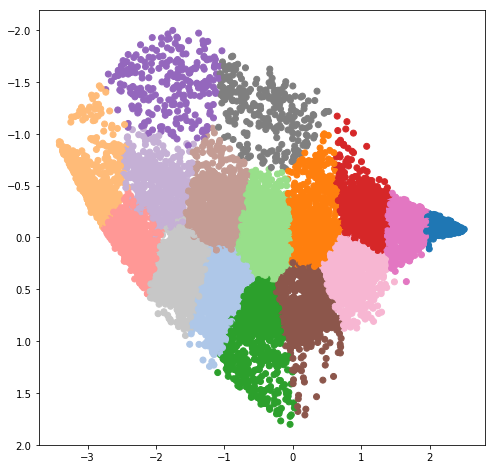

In [35]:
fig = plt.figure(figsize=(8,8))
sc = plt.scatter(bird_Z_2[:,0],bird_Z_2[:,1], c=clrs)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()